In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.ticker as mtick

In [2]:
"""
List of most important columns to keep because trying to concatenate all dfs with all columns resulted in errors
"""

cols_to_keep = ['Id', 'Id2', 'Geography', 'Households; Estimate; Total',
'Households; Margin of Error; Total', 'Families; Estimate; Total',
'Families; Margin of Error; Total', 'Households; Estimate; Median income (dollars)',
'Households; Margin of Error; Median income (dollars)',
'Families; Estimate; Median income (dollars)',
'Families; Margin of Error; Median income (dollars)',
'Married-couple families; Estimate; Median income (dollars)',
'Married-couple families; Margin of Error; Median income (dollars)',
'Nonfamily households; Estimate; Median income (dollars)',
'Nonfamily households; Margin of Error; Median income (dollars)',
'Households; Estimate; Mean income (dollars)',
'Households; Margin of Error; Mean income (dollars)',
'Families; Estimate; Mean income (dollars)',
'Families; Margin of Error; Mean income (dollars)',
'Married-couple families; Estimate; Mean income (dollars)',
'Married-couple families; Margin of Error; Mean income (dollars)',
'Nonfamily households; Estimate; Mean income (dollars)',
'Nonfamily households; Margin of Error; Mean income (dollars)']

In [3]:
def df_maker(geo, sort):
    dfs = []
    for i in range(10,18):
        # Dataframe with raw data
        df = pd.read_csv('data/primary_source_data/{}_income/ACS_{}_5YR_S1901_with_ann.csv'.format(geo, i), \
                         skiprows=1)
        df = df[cols_to_keep]
        df['year'] = 2000 + i
        dfs.append(df)        
    combined_df = pd.concat(dfs)        
    return combined_df

## NYC median income

In [4]:
# Income across NYC
nyc_income = df_maker('nyc', sort=False)
nyc_income['Geography'] = nyc_income['Geography'].map(lambda x: x.rstrip('New York').rstrip(' County,'))
nyc_income.head()

,Id,Id2,Geography,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Households; Estimate; Median income (dollars),Households; Margin of Error; Median income (dollars),Families; Estimate; Median income (dollars),...,Nonfamily households; Margin of Error; Median income (dollars),Households; Estimate; Mean income (dollars),Households; Margin of Error; Mean income (dollars),Families; Estimate; Mean income (dollars),Families; Margin of Error; Mean income (dollars),Married-couple families; Estimate; Mean income (dollars),Married-couple families; Margin of Error; Mean income (dollars),Nonfamily households; Estimate; Mean income (dollars),Nonfamily households; Margin of Error; Mean income (dollars),year
0,0500000US36005,36005,Bronx,472464,1797,310610,2101,34264,474,38431,...,801,47325,477,52161,658,73674,1248,33944,545,2010
1,0500000US36047,36047,Kings,903991,2532,581345,3562,43567,444,48777,...,453,62656,523,69252,742,84616,1064,47353,617,2010
2,0500000US36061,36061,New York,732204,3587,300147,3093,64971,675,75629,...,1024,122620,1358,161893,2826,222672,4511,94121,1304,2010
3,0500000US36081,36081,Queens,774311,2026,527510,3522,55291,482,62459,...,912,70208,495,77569,661,86864,860,49411,761,2010
4,0500000US36085,36085,Richmond,164279,1066,122677,1322,71084,1130,83264,...,1348,86604,1048,97854,1317,109437,1624,49140,1646,2010


In [5]:
# Mean of the median income across all NYC boroughs
nyc_group = nyc_income.groupby('year').mean().reset_index()
nyc_group

,year,Id2,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Households; Estimate; Median income (dollars),Households; Margin of Error; Median income (dollars),Families; Estimate; Median income (dollars),Families; Margin of Error; Median income (dollars),...,Nonfamily households; Estimate; Median income (dollars),Nonfamily households; Margin of Error; Median income (dollars),Households; Estimate; Mean income (dollars),Households; Margin of Error; Mean income (dollars),Families; Estimate; Mean income (dollars),Families; Margin of Error; Mean income (dollars),Married-couple families; Estimate; Mean income (dollars),Married-couple families; Margin of Error; Mean income (dollars),Nonfamily households; Estimate; Mean income (dollars),Nonfamily households; Margin of Error; Mean income (dollars)
0,2010,36055.8,609449.8,2201.6,368457.8,2720.0,53835.4,641.0,61712.0,910.2,...,37243.8,907.6,77882.6,780.2,91745.8,1240.8,115452.6,1861.4,54793.8,974.6
1,2011,36055.8,609995.6,2168.2,368505.8,2641.8,55139.8,697.2,63188.4,981.0,...,38327.0,888.6,80282.0,833.8,94229.4,1227.4,118868.0,1820.0,56692.8,1056.4
2,2012,36055.8,612678.6,1950.8,368763.8,2760.2,55632.2,675.6,64180.0,911.6,...,38597.0,931.8,81062.4,881.6,95373.0,1393.6,120580.4,2117.8,57463.2,1040.4
3,2013,36055.8,614059.6,2051.0,368908.0,2628.6,55940.4,783.8,65111.0,1100.2,...,38719.0,916.8,82122.6,942.8,96960.8,1486.2,122236.6,2115.0,58138.0,1099.4
4,2014,36055.8,619186.2,2079.2,371753.8,2596.6,56830.2,696.4,65760.6,1232.6,...,39300.0,883.8,83383.8,902.2,98474.8,1445.2,124219.6,2033.6,58824.8,1136.6
5,2015,36055.8,622707.0,2301.6,373055.4,2808.2,57257.6,751.4,66375.8,1284.0,...,39789.4,798.8,84646.6,948.2,100107.8,1451.2,126327.2,2138.2,59763.8,1192.4
6,2016,36055.8,625649.2,2098.2,374003.0,2930.6,59046.8,716.8,68891.6,1261.6,...,40507.8,911.0,87134.0,936.6,103569.2,1438.8,129974.2,2079.6,60882.6,1303.0
7,2017,36055.8,628481.0,2155.8,376201.0,2795.2,61481.6,793.2,72422.6,1300.8,...,41583.2,1092.4,91550.2,1043.2,109111.6,1662.4,136002.8,2354.8,62978.0,1245.0


## Manhattan median income

In [6]:
# Filter down to Manhattan only
man_income = nyc_income[nyc_income['Geography'] == 'New York']
# Mean of the median income across Brooklyn
man_group = man_income.groupby('year').mean().reset_index()

## Brooklyn median income

In [7]:
# Filter down to BK only
bk_income = nyc_income[nyc_income['Geography'] == 'Kings']
# Mean of the median income across Brooklyn
bk_group = bk_income.groupby('year').mean().reset_index()

## Red Hook median income

In [8]:
# Getting the income for Red Hook (census tracts 53, 59, an 85)
rh_income = df_maker('rh', sort=False)
rh_income = rh_income[rh_income.Id != '0400000US36']
rh_income['Geography'] = rh_income['Geography'].map(lambda x: x.lstrip('Census Tract ')\
                                                    .rstrip(', Kings County, New York'))
rh_income.rename(columns={'Geography':'census_tract'}, inplace=True)
rh_group = rh_income.groupby('year').mean().reset_index()

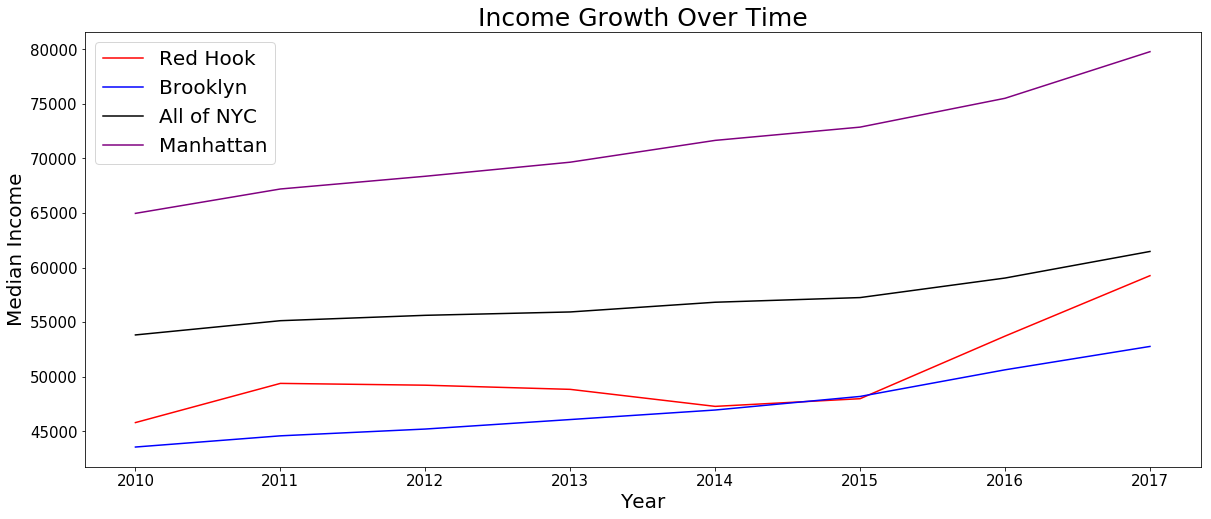

In [16]:
# Income comparison
plt.figure(figsize=(20,8))
plt.plot(rh_group['year'], rh_group['Households; Estimate; Median income (dollars)'], c='r', label='Red Hook')
plt.plot(bk_group['year'], bk_group['Households; Estimate; Median income (dollars)'], c='b', label='Brooklyn')
plt.plot(nyc_group['year'], nyc_group['Households; Estimate; Median income (dollars)'], \
         c='black', label='All of NYC')
plt.plot(man_group['year'], man_group['Households; Estimate; Median income (dollars)'], \
         c='purple', label='Manhattan')
plt.title("Income Growth Over Time", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Median Income", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [10]:
# Export to csv
# nyc_income.to_csv('data/created_data/nyc_income.csv', index=False)
# rh_income.to_csv('data/created_data/rh_income.csv', index=False)